In [1]:
import pyreadr 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import os

                                                                  
data_ml = pyreadr.read_r(os.path.join(os.path.expanduser('~'),'Downloads','data_ml.RData'))["data_ml"]
data_ml.date = pd.to_datetime(data_ml.date)  

In [2]:
data_ml[['R12M_Usd','R1M_Usd','R3M_Usd', 'R6M_Usd']].agg(['mean','std','min','max']).T

,mean,std,min,max
R12M_Usd,0.135854,0.765346,-0.991,95.972
R1M_Usd,0.012633,0.177877,-0.922,30.176
R3M_Usd,0.036206,0.331932,-0.929,39.389
R6M_Usd,0.071358,0.531054,-0.980,106.929


In [3]:
features = list(data_ml.columns[2:95])
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", 
                    "Ocf", "Pb", "Vol1Y_Usd"]

<Axes: >

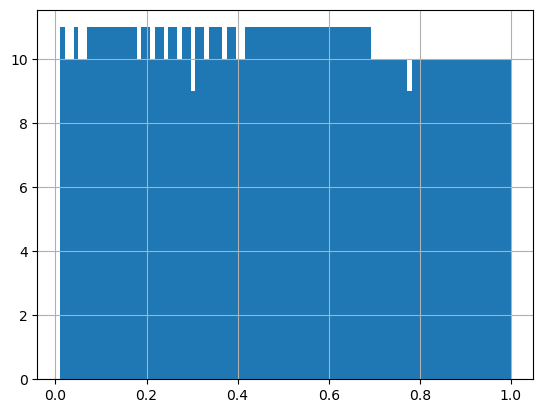

In [4]:
data_ml.loc[data_ml.date=="2000-02-29"]['Div_Yld'].hist(bins=100)

In [5]:
data_ml['R1M_Usd_C'] = data_ml.R1M_Usd >  data_ml.groupby('date').R1M_Usd.transform('median')
data_ml['R12M_Usd_C'] = data_ml.R12M_Usd >  data_ml.groupby('date').R12M_Usd.transform('median')

In [6]:
separation_date = dt.strptime("2014-01-15","%Y-%m-%d")
training_sample = data_ml[data_ml.date < separation_date]
testing_sample = data_ml[data_ml.date  >= separation_date]

In [7]:
stock_id = data_ml.stock_id.unique()
stock_days = data_ml.groupby('stock_id').date.count()
stock_ids_short = stock_days.loc[stock_days==max(stock_days)].index
returns = data_ml.loc[data_ml['stock_id'].isin(stock_ids_short)][['date','stock_id','R1M_Usd']]